In [41]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

import pyflow
from scipy.ndimage.interpolation import zoom
import skvideo.io

test_path='test_data/All_Blacks.5846.main_glosses.mb.r480x360.mp4'
#test_path='test_data/_1276_small_3.mov'

video =skvideo.io.vread(test_path).astype(float)/255
video=video[0:30,:,:,:]
T,h,w,c=video.shape

#h,w=(300,300)
#h_factor,w_factor=(h/original_h,w/original_w)
#video=zoom(video,zoom=(1,h_factor,w_factor,1),order=1)



print(video.shape)


(30, 368, 480, 3)


In [42]:

# Flow Options:
alpha = 0.012
ratio = 0.75
minWidth = 25
nOuterFPIterations = 3
nInnerFPIterations = 1
nSORIterations = 15
colType = 0  # 0 or default:RGB, 1:GRAY (but pass gray image with shape (h,w,1))
flow_intensity=np.zeros((T,h,w))
for t in range (1,T):
    print("%d/%d" % (t,T))
    u, v, im2W = pyflow.coarse2fine_flow(
    video[t-1,:,:,:], video[t,:,:,:], alpha, ratio, minWidth, nOuterFPIterations, nInnerFPIterations,
    nSORIterations, colType)
    intensity=np.sqrt(u**2+v**2)
    flow_mean=np.mean(intensity)
    flow_std=np.std(intensity)
    print(flow_mean,flow_std)
    intensity[intensity<flow_mean+flow_std*1.5]=0
    flow_intensity[t,:,:]=intensity


1/30
0.147660105547 0.206227474948
2/30
0.263571027905 0.432199230297
3/30
0.367728091041 0.751541325893
4/30
0.5311171083 1.94242994648
5/30
1.01613823304 3.98918472125
6/30
1.6265450607 5.61701774647
7/30
1.88450641339 5.84690908503
8/30
1.83991107941 4.66154339614
9/30
1.48837876811 3.51446716825
10/30
1.18685982016 2.31206413743
11/30
0.916872773553 1.37100358462
12/30
0.597194592032 0.815605856175
13/30
0.301561291721 0.419987066432
14/30
0.185968847098 0.260283870804
15/30
0.117239824059 0.182330283675
16/30
0.126192772397 0.184748168053
17/30
0.247397421932 0.23071567635
18/30
0.222108600505 0.318631204885
19/30
0.224212202072 0.428184971044
20/30
0.342281578119 0.577239072495
21/30
0.394330270239 0.633153797464
22/30
0.500679325037 0.639959011884
23/30
0.449154382243 0.598602326292
24/30
0.495302027712 0.542374683427
25/30
0.274057029874 0.317890118482
26/30
0.1948159483 0.185719901015
27/30
0.153444494611 0.115275591828
28/30
0.178078667202 0.0979024197513
29/30
0.125813671679

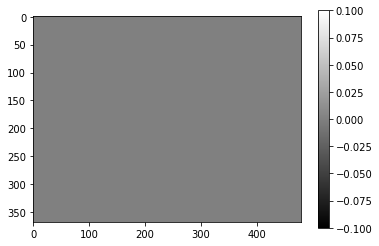

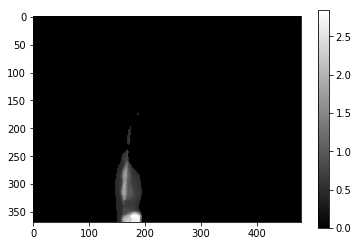

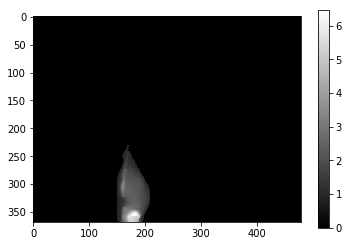

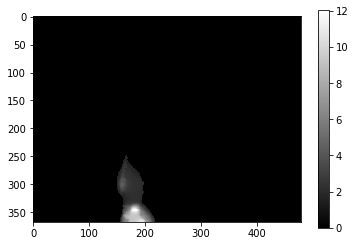

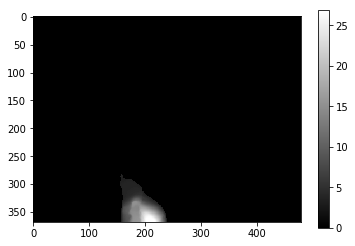

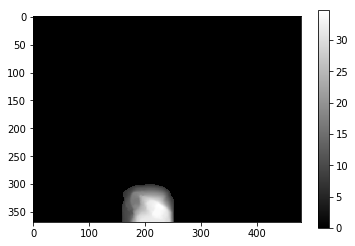

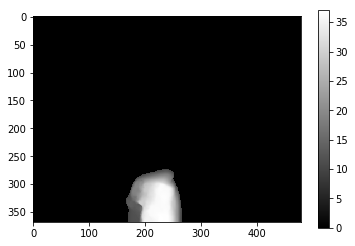

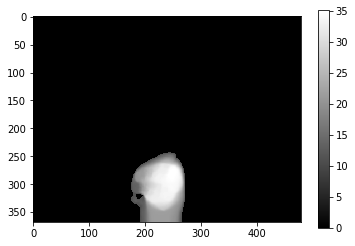

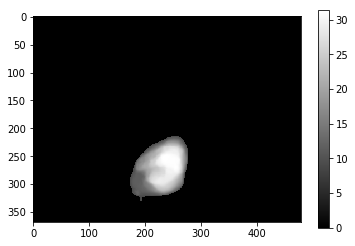

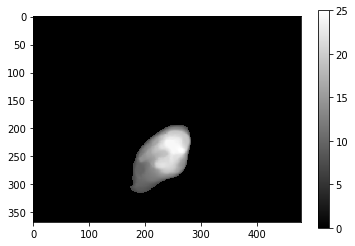

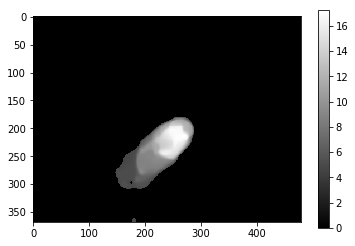

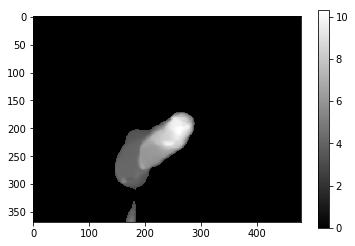

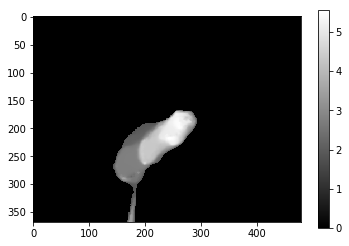

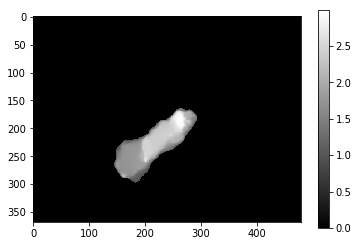

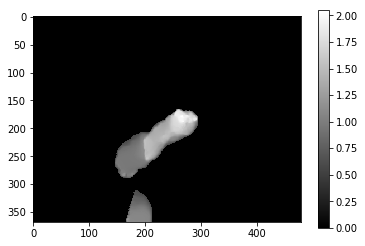

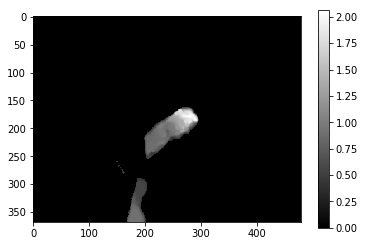

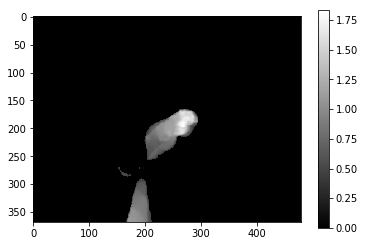

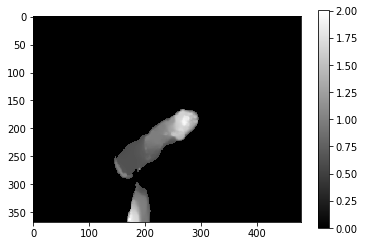

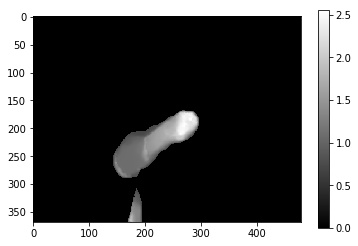

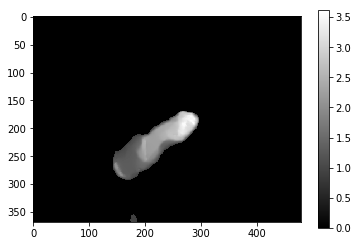

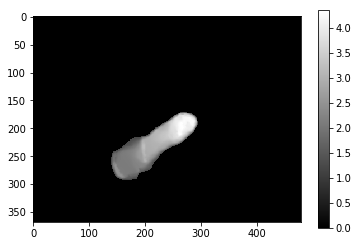

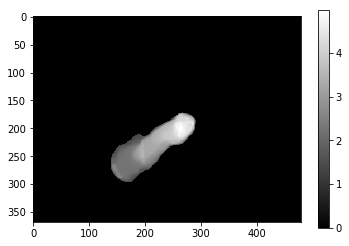

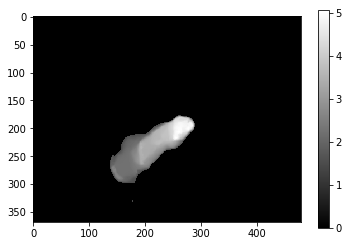

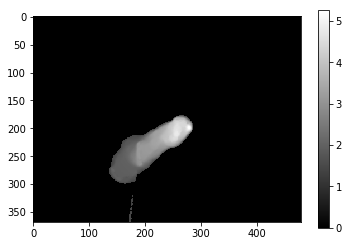

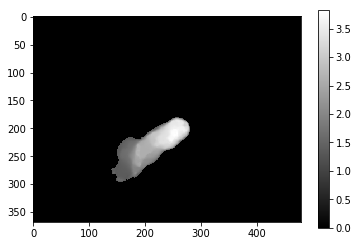

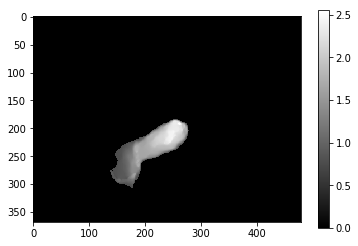

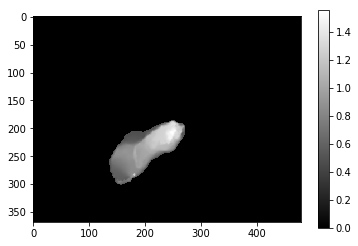

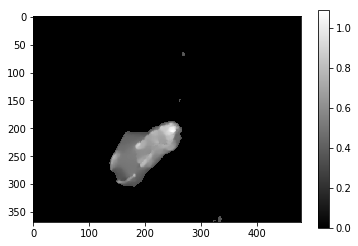

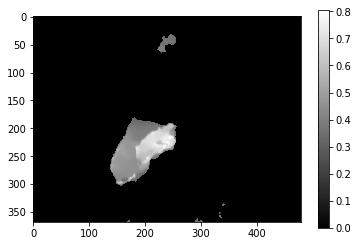

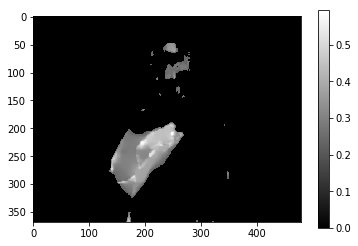

In [43]:

import matplotlib.pyplot as plt
import matplotlib
from  skimage import morphology

#output_path='tmp/optical/'

for t in range(T):
    intensity=flow_intensity[t,:,:]
    intensity=morphology.opening(intensity)
    plt.figure()
    plt.imshow(intensity,cmap='gray',vmin=0)
    plt.colorbar()
    plt.show()
